<a href="https://colab.research.google.com/github/abdutlgz/DIMPLE/blob/main/HW2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df_lin = pd.read_csv('HW2_linear_data.csv', delimiter=';')
df_lin = df_lin.sort_values(by = 'X')
df_lin.loc[30, 'X'] = 52.2246
df_lin.loc[26, 'X'] = 57.3195
df_lin['X'] = df_lin['X'].astype(float)
#df_lin.tail(30)
df_lin

,X,Y
99,25.12848,53.45439
70,31.58812,50.39267
0,32.50235,31.70701
45,32.66904,45.57059
90,32.94048,67.17066
...,...,...
21,65.41605,118.59120
20,66.18982,83.87856
94,68.31936,97.91982
92,68.76573,114.85390


In [ ]:
#https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/
x = np.arange(25,72,1)
y = 1.5 * x

In [12]:
def MSE(y, y_predicted):
  return 1/len(y) * np.sum((y- y_predicted)**2)

In [13]:
def gradient_descent(x , y, learn_rate = 0.0001, epochs = 1000):
  current_m = 1.5
  current_b = 0
  for i in range(epochs):
    y_predicted = current_m * x + current_b
    gradient_m = (-2/len(y))*sum(x * (y - y_predicted))
    gradient_b = (-2/len(y))*sum(y - y_predicted)
    current_m = current_m - learn_rate * gradient_m
    current_b = current_b - learn_rate * gradient_b
  return current_m, current_b



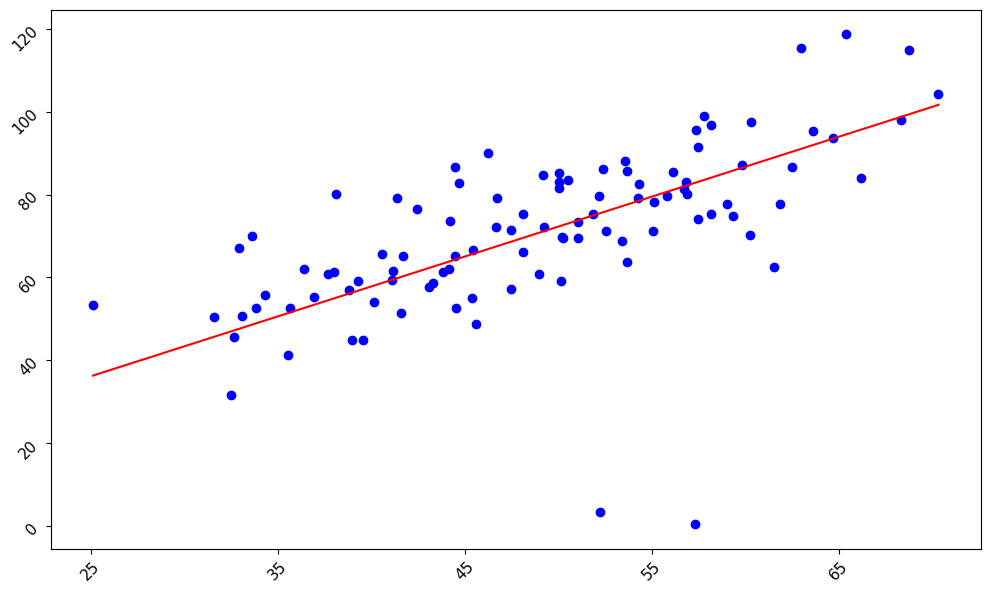

In [21]:
m, b = gradient_descent(df_lin['X'], df_lin['Y'])
y_predicted = m * df_lin['X'] + b
plt.figure(figsize=(12, 7))
plt.xticks(np.arange(25, 75, 10))
#plt.yticks(np.arange(40, 120, 10))
plt.scatter(df_lin['X'], df_lin['Y'],color='blue')
plt.tick_params(labelsize = 11,labelrotation = 45)
plt.plot(df_lin['X'], y_predicted, color='red' )
plt.show()

In [19]:
mse = MSE(df_lin['Y'], y_predicted)
mse

232.33590413214807

In [42]:
df_non = pd.read_csv('HW2_nonlinear_data.csv',delimiter=';')
df_non = df_non[~df_non.applymap(lambda x: '#' in str(x)).any(axis=1)]
df_non = df_non.dropna()
df_non['X'] = df_non['X'].astype(float)
df_non = df_non.sort_values(by = 'X')
df_non

,X,Y
15,-9.663230,-8650.620
24,-9.271340,-8154.750
52,-8.913770,-6612.570
75,-8.819010,-6514.860
50,-8.707080,-5437.650
...,...,...
86,9.037353,9318.342
18,9.037469,9672.820
38,9.126243,9867.094
56,9.566124,10266.230


In [65]:
def gradient(x,y, epochs, learn_rate):
  a = 0
  b = 0
  c = 0
  d = 0
  for i in range(epochs):
    y_predicted = a*x**3 + b*x**2+c*x+d
    da = (-2/len(x)) * np.sum(x**3 * (y-y_predicted))
    db = (-2/len(x)) * np.sum(x**2 * (y-y_predicted))
    dc = (-2/len(x)) * np.sum(x * (y-y_predicted))
    dd = (-2/len(x)) * np.sum((y-y_predicted))

    a = a - learn_rate * da
    b = b - learn_rate * db
    c = c - learn_rate * dc
    d = d - learn_rate * dd
  return a,b,c,d

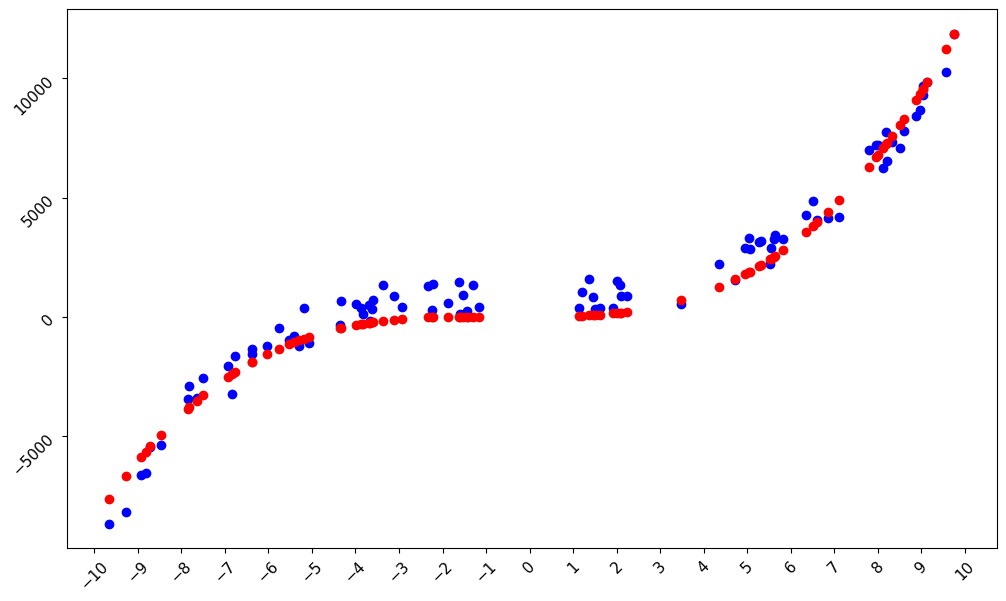

In [66]:

X = df_non['X']
Y = df_non['Y']
a,b,c,d = gradient(X, df_non['Y'], 10000, 0.000001)
plt.figure(figsize=(12, 7))
plt.xticks(np.arange(-10, 11, 1))
#plt.yticks(np.arange(40, 120, 10))
plt.scatter(X, Y,color='blue')
plt.scatter(X, a*X**3 + b*X**2 +c*X + d, color='red')
plt.tick_params(labelsize = 11,labelrotation = 45)
#plt.plot(df_lin['X'], y_predicted, color='red' )
plt.show()